In [1]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [2]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [3]:
torch.cuda.set_device(0)

In [4]:
!pwd

/home/gaurav/PycharmProjects/nlp-for-malyalam/classification


In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-malyalam/classification')

In [6]:
!ls

Malyalam_Classification_Model.ipynb  Malyalam_News_Classification.csv


In [7]:
df = pd.read_csv(path/'Malyalam_News_Classification.csv')
df.tail()

,headings,label
6291,"മെസിയെ ഫൗള്‍ ചെയ്യരുത്, ഫോട്ടോ എടുക്കരുത്: വിച...",sports
6292,"സൂപ്പര്‍ താരത്തെ പുറത്താക്കി ലോക കപ്പ് ടീം, അമ...",sports
6293,സഹതാരങ്ങള്‍ക്ക് വീട്ടില്‍ വിരുന്നൊരുക്കി മുന്‍...,sports
6294,ധവാന്‍ രഞ്ജി കളിക്കണമായിരുന്നു; ടി20ക്ക് ശേഷം ...,sports
6295,എടിപി മാസ്റ്റേഴ്‌സ് ടൂര്‍ണമെന്റില്‍ ഇന്ത്യന്‍ ...,sports


In [8]:
df['label'].unique()

array(['entertainment', 'business', 'sports'], dtype=object)

In [9]:
print('Entertainment', (df['label'] == 'entertainment').sum())
print('Business', (df['label'] == 'business').sum())
print('Sports', (df['label'] == 'sports').sum())

Entertainment 2184
Business 1923
Sports 2189


In [10]:
df['headings'][0]

'കഷ്ടപ്പെട്ട് ജോലിയെടുക്കില്ല, ശരിക്കും മടിയന്\u200d : സത്യം മറച്ചുവയ്ക്കാതെ രണ്\u200dവീര്\u200d സിംഗ്'

In [11]:
df.shape

(6296, 2)

In [13]:
df[df['headings'].isnull()].shape

(0, 2)

In [14]:
label_cols = list(range(1,df.shape[1]))

In [15]:
print(label_cols)

[1]


In [16]:
id_to_col = list(df.columns)

In [17]:
col_to_id = {}
for i, col in enumerate(id_to_col):
    col_to_id[col] = i

In [18]:
class MalyalamTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [19]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/malyalam_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(10000)]

In [20]:
# 10,000 is the vocab size that we chose in sentencepiece
malyalam_vocab = Vocab(itos)

In [21]:
tokenizer = Tokenizer(tok_func=MalyalamTokenizer, lang='ml')

In [22]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [23]:
data_lm = TextDataBunch.from_csv(path=path, csv_name='Malyalam_News_Classification.csv', text_cols=[0], label_cols=label_cols, tokenizer=tokenizer, vocab=malyalam_vocab)

In [24]:
data_lm.save()

In [25]:
bs=48

In [26]:
data_lm = TextLMDataBunch.load(path, 'tmp', bs=bs)

In [27]:
data_lm.show_batch()

idx,text
0,▁ x x bo s ▁മലയാള ികളായ ▁വിമാന യാത്ര ക്കാര ് ▁ ക്ക് ▁മാത്രം ▁ടി ക്ക റ്റ് ▁നിരക്ക ുകളില ് ▁വന ് ▁ഇള വ് ▁ x x bo s ▁എതിരാളി കളെ ▁ബഹു ദൂര ം ▁പിന്ന ില ാക്കി ▁മാ രു തി ▁സു സൂ ക്കി യുടെ ▁ബ്ര സ്സ ▁ x x bo s ▁നെയ് മ റിന് ▁പണി ▁കിട്ടിയ േ ക്കും ; ▁അന്വേഷണ ം ▁പ്രഖ്യാപിച്ച ് ▁യു വേ ഫ ▁ x x bo
1,് ▁ഘട്ട ത്തില ് ▁ x x bo s ▁ലോകകപ്പ ിനു ▁മു മ ് ബ് ▁അനുയോജ്യമായ ▁തുടക്കം : ▁ഓ യ ിന് ▁മോ ര ് ▁ഗ ന് ▁ x x bo s ▁അ ടിച്ചു ▁ത കര ് ▁ ത്ത് ▁ധ വ ാനും ▁ രോ ഹിത ും ; ▁നാലാം ▁ഏകദിന ത്തില ് ▁റ ണ് ▁മല ▁കയറി ▁ഇന്ത്യ ▁ x x bo s ▁സത്യ ങ്ങള ് ▁ഞാ ന് ▁പറയ ാന ് ▁തുടങ്ങിയ ാല
2,▁നിര ് ▁ ണ ായ ക മാറ്റ ത്തിന് ▁സാധ്യത യേ റി ▁ x x bo s ▁നാലു മാസ ത്തെ ▁ഇടവേള യ്ക്ക് ▁ശേഷം ▁പാര ് ▁വ തി ▁തിരിച്ച െത്തി ▁ x x bo s ▁ചാര ു ഹാ സ ന് ▁ചിത്രം ▁പൗ ഡ റിന്റെ ▁പുതിയ ▁പോ സ്റ്റ ര ് ▁പുറത്തു വിട്ടു ▁ x x bo s ▁ഡൈ നാ മോ ▁കീ വിനെ ▁ത കര ് ▁ ത്ത് ▁ചെ ല് ▁സി ▁യൂറോപ്പ ▁ലീഗ്
3,"് ▁മൂന്നാം ▁ദിവസവും ▁നേട്ട ത്തില ് ▁ക്ലോ സ് ▁ചെയ്തു ▁ x x bo s ▁ഫിഫ ാ ▁മ ഞ്ചേരി ▁സൂ പ്പ ര ് ▁സ്റ്റുഡിയോ ▁പോരാട്ട ം ▁സമ നില യില ് ▁ x x bo s ▁ആ ഡ ംബ ര ▁വിവാഹ ത്തില ് ▁തി ള ങ്ങിയ ത് ▁താര സുന്ദര ി മാര ് ▁ ▁ഐശ്വര്യ , ▁ദീപ ിക , ▁കര ീന ▁എല്ലാവരും ▁ലു ക്ക് ▁കിട ില നാക്കി ▁ x x bo"
4,"റിന്റെ ▁ബോളിവുഡ ് ▁ചിത്രം ▁സോ യ ▁ഫാ ക് റ്റ ര ് ▁ജൂ ണ് ▁14 ▁ന് ▁തിയേറ്ററ ുകളില ് ▁ x x bo s ▁ശ്രീശാന്ത ിന്റെ ▁വിലക്ക ് ▁നീക്കി ▁ ; ▁താര ത്തിന് ▁ഇനി ▁കളി ക്കാ ം ▁ x x bo s ▁ഫ െല്ലി നി ▁ഇനി ▁ബെ ല് ▁ ജിയ ത്തിനായി ▁കളി ക്ക ില്ല , ▁രാജ്യാന്തര ▁ഫുട്ബോള ില ് ▁നിന്ന് ▁വിരമിച്ച ു ▁ x x bo s ▁ആദ്യ ▁അഡ്വ ഞ്ച ര"


In [28]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [29]:
# Loading the pretrained language model on malyalam wikipedia
learn.load('/home/gaurav/PycharmProjects/nlp-for-malyalam/language-model/MalyalamDataset/models/third_ml_lm', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (5036 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/gaurav/PycharmProjects/nlp-for-malyalam/classification
x: LMTextList (5036 items)
[Text ▁ x x bo s ▁മോഹ ന് ▁ലാ ല ിനു ▁വേണ്ടി ▁ലൂ സി ഫ ര ് ▁ആ ന്ത വുമായി ▁ഉ ഷ ▁ഉ തു പ്പ് <unk> ▁ചിത്രം ▁പങ്കു വെച്ച ് ▁മു ര ളി ▁ഗോപി, Text ▁ x x bo s ▁മോഹ ന് ▁ലാ ല് ▁ചിത്രം ▁ലൂ സി ഫ റി ല് ▁പ്രമുഖ നായി ▁ലാ ന് ▁ ഡ് ▁മാ സ്റ്റ ര ് ▁കാര ്, Text ▁ x x bo s ▁ഗോള ് ▁വേട്ട യുമായി ▁വീണ്ടും ▁ബല ോട്ട െല്ലി ; ▁ആരാധക ര ് ▁ആവേശ ത്തില ്, Text ▁ x x bo s ▁പ്ര വാസി ▁നിക്ഷേപ ങ്ങളെ ▁കേരള ത്തിലേക്ക് ▁ആ കര ് ▁ഷി ക്കാന ് ▁പുതിയ ▁സംവിധാന വുമായി ▁നോ ര ് ▁ ക്ക, Text ▁ x x bo s ▁കനത്ത ▁ചൂട ില ് ▁നാട ു ▁വലയ ുമ ് ബോ ള ് ▁സൗര ോ ര ് ▁ ജ്ജ ത്തിലൂടെ ▁നേട്ട മ ുണ്ടാക്കി ▁എം ജി ▁സര ് ▁വ കലാ ശാല]...
Path: /home/gaurav/PycharmProjects/nlp-for-malyalam/classification;

Valid: LabelList
y: LMLabel (1260 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/gaurav/Py

In [30]:
# Fine tuning the prtrained LM on current dataset

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


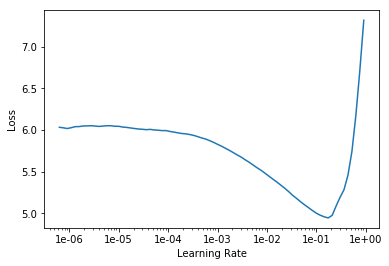

In [32]:
learn.recorder.plot()

In [33]:
learn.freeze()

In [34]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.892828,4.374544,0.337874


In [35]:
learn.save('fit_head', with_opt=True)

In [36]:
learn.load('fit_head', with_opt=True);

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.277577,4.168032,0.356473
2,4.063316,3.839864,0.391461
3,3.790938,3.576284,0.424691
4,3.526112,3.406083,0.445782
5,3.289855,3.288762,0.463344
6,3.101046,3.212809,0.472700
7,2.934580,3.167746,0.479875
8,2.813470,3.145847,0.482080
9,2.732559,3.136381,0.484635
10,2.694386,3.134807,0.484459


In [39]:
learn.save('fine_tuned', with_opt=True)

In [40]:
learn.load('fine_tuned', with_opt=True);

In [42]:
learn.predict('മലയാള ികളായ ▁വിമാന യാത്ര ക്കാര',n_words=10)

'മലയാള ികളായ ▁വിമാന യാത്ര ക്കാര ് ▁14 ▁കോടി ▁4 x x bo s ▁സാമ ▁'

In [44]:
learn.save_encoder('fine_tuned_enc')

In [45]:
data_clas = TextClasDataBunch.from_csv(path=path, csv_name='Malyalam_News_Classification.csv', tokenizer=tokenizer, vocab=malyalam_vocab, text_cols=[0], label_cols=label_cols)

In [46]:
data_clas.show_batch()

text,target
▁ x x bo s ▁ശ ▁ബ ▁ രി ▁മ ▁ല ▁വി ▁ക ▁സ ▁ന ത്തിനായി ▁സ ▁ര ് ▁ ക്കാ ▁ര ് ▁നി ▁യ ▁ന് ത്ര ▁ ണ ▁ ത്തി ▁ല ് ▁പ്ര ▁ ത് യേ ▁ക ▁ക ▁മ ് ബ ▁നി ▁ര ൂ ▁പീ ▁ക ▁ രി ▁ ക്കാ ▁ന് ▁തീ ▁ രു ▁മാ ▁ന ം ; ▁നടപടി ▁തീ ▁ x x re p ▁5 ▁ര ് ▁,business
▁ x x bo s ▁ഇന്ത്യ യില ് ▁റി ല യ ന് ▁സ് ▁ജി യോ യ്ക്ക് ▁പ്രത്യേക ▁പരിഗണന ▁ന ല് ▁കുന്ന വ െന്ന ▁ആരോപണ വുമായി ▁വോ ഡ ഫോ ണ് ▁മേധാവി ; ▁' പ ▁ x x re p ▁4 ▁ല ▁ടെ ▁ x x re p ▁4 ▁ലി ▁ x x re p ▁4 ▁കോ ം ▁നി ▁ x x re p ▁4 ▁യ ▁ x x re p ▁4,business
▁ x x bo s ▁കേ ▁ x x re p ▁4 ▁ ന്ദ്ര ▁ x x re p ▁4 ▁സ ▁ x x re p ▁4 ▁ര ് ▁ x x re p ▁4 ▁ ക്കാ ▁ x x re p ▁4 ▁ രി ▁ x x re p ▁4 ▁ന് ▁റെ ▁പു ▁ x x re p ▁4 ▁തി ▁ x x re p ▁4 ▁യ ▁റ ▁,business
▁ x x bo s ▁അ ങ്ങ േ ര ് ▁പാവ ം ▁മനുഷ്യ ന് ▁ ; ▁അ ങ്ങ േ രെ ▁കൊണ്ട ൊന്നും ▁ x x re p ▁6 ▁. ▁ഞാ ന് ▁വിശ്വസിക്ക ില്ല ; ▁അ ങ്ങ േ ര ് ▁ ക്ക് ▁അത ൊന്നും ▁പറ്റി ല്ലാ ന്ന ുള്ള താണ് ; ▁ഇന ് ▁ഡ സ് ട്രി ▁മുഴുവനും ▁അറിയ ാവുന്ന ▁കാര്യ മാണ ത് ; ▁അ പ്പോ ▁ന മ്മ ളി ത ൊക്കെ ▁എ ങ്ങ,entertainment
"▁ x x bo s ▁സ്വ ന്ത ക്കാര നെ ▁ഗവ ര ് ▁ ണ റ ാക്കിയ ത് ▁വെ റു തേ യായ ില്ല ; ▁വര ് ▁ഷ ം ▁അവസാന ി ക്കാന ് ▁കാത്തിരിക്ക ാതെ ▁28 ,000 ▁കോടി ▁കേന്ദ്ര ▁സര ് ▁ ക്കാര ിന് ▁ഇട ക്കാല ▁ലാഭ വി ഹിത മായി ▁ന ല് ▁കി ▁റിസ ര ് ▁വ ് ▁ബാങ്ക് ; ▁ആഗ സ്റ്റ ില ് ▁4 0,000 ▁കോടി ▁ന ല് ▁ക ിയ തിന്",business


In [47]:
data_clas.sanity_check()

In [48]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)

In [49]:
learn.load_encoder('fine_tuned_enc')

In [50]:
learn.freeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


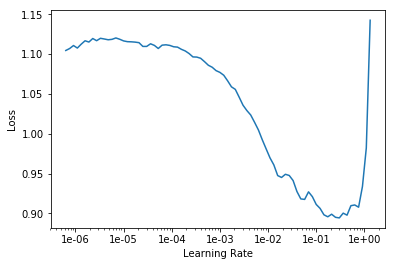

In [52]:
learn.recorder.plot()

In [53]:
learn.loss_func.func

CrossEntropyLoss()

In [54]:
kappa = KappaScore()

In [55]:
learn.metrics = [kappa, accuracy]

In [56]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy
1,0.691934,0.413044,0.784620,0.856349


In [57]:
learn.save('first-full')

In [58]:
learn.load('first-full');

In [59]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy
1,0.525036,0.278767,0.852212,0.901587
2,0.368565,0.203933,0.893889,0.929365
3,0.292219,0.178353,0.916496,0.944444
4,0.177254,0.175377,0.915315,0.943651
5,0.153373,0.178374,0.915324,0.943651


In [60]:
learn.save('final')

In [61]:
learn.predict('ന്യൂഡല്‍ഹി: വിക്കറ്റിന് പിറകിൽ എം.എസ്. ധോനിയുടെ പിന്‍ഗാമിയായി സെലക്ടര്‍മാര്‍ ഉയര്‍ത്തിക്കാട്ടിയ താരമായിരുന്നു ഋഷഭ് ')

(Category sports, tensor(2), tensor([0.2249, 0.0265, 0.7486]))

In [62]:
learn.predict("കോഴിക്കോട്: ഏറെ പ്രതീക്ഷയോടെ ഐ ലീഗ് സീസണിന് ഇറങ്ങിയ ഗോകുലം കേരള എഫ്.സിക്ക് ഒടുവില്‍ നിരാശയായിരുന്നു")

(Category sports, tensor(2), tensor([0.1004, 0.0076, 0.8920]))

In [63]:
learn.predict("ഒരൊറ്റ സീന്‍. ഒരൊറ്റ ഡയലോഗ്. ഇരിങ്ങാലക്കുടയ്ക്കപ്പുറത്ത് ഏറെയൊന്നും അറിയപ്പെടാതിരുന്ന ആളൂര്‍")

(Category entertainment, tensor(1), tensor([0.0050, 0.9913, 0.0037]))

In [64]:
learn.predict("ബിഗ് ബോസ് എന്ന റിയാലിറ്റി ഷോയിലൂടെ മലയാളികളുടെ പ്രിയങ്കരനായി മാറിയ ടെലിവിഷന്‍ താരമാണ് ഷിയാസ് ")

(Category entertainment, tensor(1), tensor([0.0015, 0.9951, 0.0034]))

In [65]:
learn.predict("ന്യൂഡല്‍ഹി: തിരഞ്ഞെടുപ്പിന് മാസങ്ങൾമാത്രം ശേഷിക്കെ മോദി സർക്കാരിന്റെ അഞ്ചുവർഷത്തെ നേട്ടങ്ങൾ")

(Category business, tensor(0), tensor([0.9818, 0.0151, 0.0031]))